In [25]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle
from astropy import constants, units

In [26]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [3]:
rootdir = ''

Obtain the UVB grids for HM12, KS19, and FG20

In [4]:
# Isolate data form HM12, FG20
hm12_z_grid, hm12_wav_grid, hm12_J_nu_grid = read_uvb(rootdir, 'hm12_galaxy.ascii')
ks19_z_grid, ks19_wav_grid, ks19_J_nu_grid = read_uvb(rootdir, 'ks19_q18.ascii')
fg20_z_grid, fg20_wav_grid, fg20_J_nu_grid = read_uvb(rootdir, 'fg20_galaxy.ascii')

Sameer et al. 2024 densities

In [5]:
X1 = np.array([[0.3985, -3.04, 0.05, 0.07],
[0.3985, -4.62, 0.06, 0.06],
[0.357, -2.7, 0.3, 0.3],
[0.357, -2.89, 0.02, 0.02],
[0.2784, -3.48, 0.07, 0.07],
[0.3815, -3.40, 0.04, 0.04],
[0.3815, -3.4, 0.1, 0.1],
[0.4828, -2.52, 0.02, 0.02],
[0.4828, -0.91, 0.06, 0.06],
[0.4828, -2.70, 0.06, 0.06],
[0.4828, -2.45, 0.05, 0.05],
[0.138, -4.91, 0.04, 0.06],
[0.1383, -2.80, 0.01, 0.01],
[0.1383, -3.21, 0.03, 0.03],
[0.1546, -2.7, 0.4, 0.6],
[0.1241, -4.22, 0.07, 0.07],
[0.1241, -4.76, 0.03, 0.03],
[0.1241, -3.65, 0.05, 0.05],
#[0.1241, >-2.7],
[0.5504, -3.48, 0.07, 0.07],
[0.5504, -1.6, 0.2, 0.1],
[0.5504, -2.5, 0.2, 0.2],
[0.5504, -3.9, 0.3, 0.3],
[0.5504, -2.84, 0.05, 0.05],
[0.5504, -2.59, 0.02, 0.03],
[0.5504, -1, 1, 1],
[0.661, -0.6, 0.1, 0.1],
[0.661, -2.1, 0.1, 0.1],
[0.661, -3.3, 0.2, 0.1],
[0.661, 0.0, 0.3, 0.3],
[0.0708, -2.92, 0.03, 0.03],
[0.0708, -3.52, 0.06, 0.06],
[0.0708, -3.3, 0.1, 0.1],
[0.4592, -2.57, 0.01, 0.01],
#[0.4592, <0.3],
[0.4592, -1.7, 0.2, 0.2],
[0.4592, -2.95, 0.02, 0.02],
[0.4592, -0.6, 0.7, 0.7],
[0.0949, -3.8, 0.1, 0.1],
[0.0921, -3.7, 0.1, 0.1],
#[0.4302, -1, 1, 1],
[0.4302, -0.5, 0.4, 0.4],
[0.1537, -3.37, 0.02, 0.02],])

In [6]:
X2 = np.array([[0.67546,-2.7, 0.3, 0.2],
[0.67546,-3.80, 0.08, 0.06],
[1.04431,-3.08, 0.06, 0.06],
[1.04431,-3.38, 0.06, 0.06],
[1.04431,-3.49, 0.08, 0.08],
[1.04431,-3.1, 0.2, 0.1],
[1.09457,-2.6, 0.2, 0.2],
[1.09457,-3.67, 0.07, 0.09],
[1.16591,-3.18, 0.03, 0.03],
[1.16591,-3.9, 0.1, 0.1],
[1.22541,-4.24, 0.04, 0.04],
[1.25937,-3.3, 0.2, 0.1],
[1.27767,-2.4, 0.6, 0.3],
[1.27767,-4.29, 0.08, 0.08],
[1.27767,-4.07, 0.06, 0.06]])

Plot

In [7]:
x1 = X1[:,0]
y1 = X1[:,1]
dy1_lo = X1[:,2]
dy1_hi = X1[:,3]

x2 = X2[:,0]
y2 = X2[:,1]
dy2_lo = X2[:,2]
dy2_hi = X2[:,3]

Text(0, 0.5, '$\\log(n_\\mathrm{H}/\\mathrm{cm}^{-3})$')

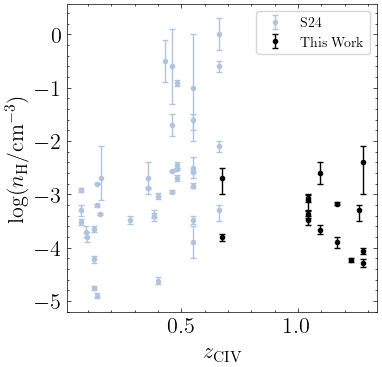

In [8]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.errorbar(x1, y1, yerr = [dy1_lo, dy1_hi], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='lightsteelblue', label='S24')

ax.errorbar(x2, y2, yerr = [dy2_lo, dy2_hi], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='black', label='This Work')

ax.legend(fontsize=10, loc='upper right')

ax.set_xlabel(r'$z_\mathrm{CIV}$')
ax.set_ylabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')

Convert to ionization parameters, first Sameer et al.

In [9]:
uvb_dict = {'PIE':'ks19', 'TDP-low':'hm12'}

cloud_types = np.array(['PIE',
        'TDP-low',
        'TDP-low',
        'PIE',
        'PIE',
        'PIE',
        'PIE',
        'PIE',
        'PIE',
        'PIE',
        'PIE',
        'TDP-low',
        'PIE',
        'PIE',
        'PIE',
        'TDP-low',
        'TDP-low',
        'TDP-low',
        #'PIE',
        'TDP-low',
        'PIE',
        'TDP-low',
        'TDP-low',
        'TDP-low',
        'PIE',
        'TDP-low',
        'PIE',
        'TDP-low',
        'PIE',
        'TDP-low',
        'PIE',
        'PIE',
        'PIE',
        'PIE',
        #'TDP-high',
        'PIE',
        'TDP-low',
        'TDP-low',
        'PIE',
        'PIE',
        #'TDP-low',
        'TDP-low',
        'PIE'])

In [10]:
D1 = np.zeros(np.shape(X1))
D1[:,0] = X1[:,0] # Copy redshifts
D1[:,2] = X1[:,3] # In log, errors stay the same in magnitude but get swapped
D1[:,3] = X1[:,2] # Cool property!

In [11]:
for i in range(D1.shape[0]):
    
    z = X1[i,0]
    hdens = 10**X1[i,1]
    
    # Specify UVB
    uvb = uvb_dict[cloud_types[i]]
    
    if uvb == 'ks19':
        D1[i,1] = np.log10(calc_U(ks19_wav_grid, 
                           fetch_sed(z, ks19_z_grid, ks19_J_nu_grid), # Fetch SED
                           hdens))
        
    else:
        D1[i,1] = np.log10(calc_U(hm12_wav_grid, 
                           fetch_sed(z, hm12_z_grid, hm12_J_nu_grid), # Fetch SED
                           hdens))        

Then my work

In [12]:
D2 = np.zeros(np.shape(X2))
D2[:,0] = X2[:,0]
D2[:,2] = X2[:,3] 
D2[:,3] = X2[:,2]

In [13]:
for i in range(D2.shape[0]):
    
    z = X2[i,0]
    hdens = 10**X2[i,1]
    
    D2[i,1] = np.log10(calc_U(fg20_wav_grid, 
                       fetch_sed(z, fg20_z_grid, fg20_J_nu_grid), # Fetch SED
                       hdens))

Now plot

In [14]:
t1 = D1[:,0]
q1 = D1[:,1]
dq1_lo = D1[:,2]
dq1_hi = D1[:,3]

t2 = D2[:,0]
q2 = D2[:,1]
dq2_lo = D2[:,2]
dq2_hi = D2[:,3]

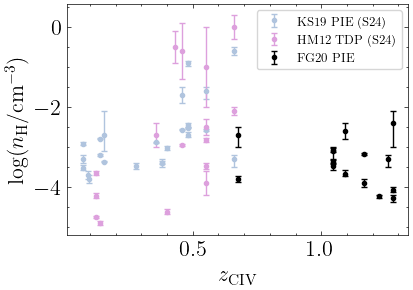

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,3))

# Densities

ax.errorbar(x1[cloud_types=='PIE'], y1[cloud_types=='PIE'], 
                 yerr = [dy1_lo[cloud_types=='PIE'], dy1_hi[cloud_types=='PIE']], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='lightsteelblue', label='KS19 PIE (S24)')

ax.errorbar(x1[cloud_types=='TDP-low'], y1[cloud_types=='TDP-low'], 
                 yerr = [dy1_lo[cloud_types=='TDP-low'], dy1_hi[cloud_types=='TDP-low']], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='plum', label='HM12 TDP (S24)')


ax.errorbar(x2, y2, yerr = [dy2_lo, dy2_hi], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='black', label='FG20 PIE')

ax.legend(fontsize=9, loc='upper right')

ax.set_xlabel(r'$z_\mathrm{CIV}$')
ax.set_ylabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')

plt.subplots_adjust(wspace=0.25, hspace=0.2)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/n_H_z_CIV.png', dpi=300)

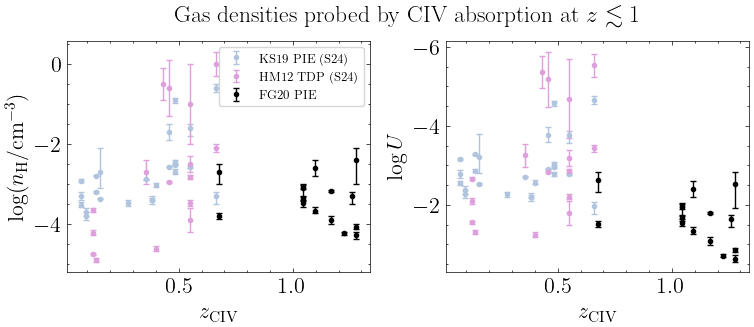

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(4.4*2,3))

# Densities

axes[0].errorbar(x1[cloud_types=='PIE'], y1[cloud_types=='PIE'], 
                 yerr = [dy1_lo[cloud_types=='PIE'], dy1_hi[cloud_types=='PIE']], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='lightsteelblue', label='KS19 PIE (S24)')

axes[0].errorbar(x1[cloud_types=='TDP-low'], y1[cloud_types=='TDP-low'], 
                 yerr = [dy1_lo[cloud_types=='TDP-low'], dy1_hi[cloud_types=='TDP-low']], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='plum', label='HM12 TDP (S24)')


axes[0].errorbar(x2, y2, yerr = [dy2_lo, dy2_hi], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='black', label='FG20 PIE')

axes[0].legend(fontsize=9, loc='upper right')

axes[0].set_xlabel(r'$z_\mathrm{CIV}$')
axes[0].set_ylabel(r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3})$')

# logU

axes[1].errorbar(t1[cloud_types=='PIE'], q1[cloud_types=='PIE'], 
                 yerr = [dq1_lo[cloud_types=='PIE'], dq1_hi[cloud_types=='PIE']], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='lightsteelblue')

axes[1].errorbar(t1[cloud_types=='TDP-low'], q1[cloud_types=='TDP-low'], 
                 yerr = [dq1_lo[cloud_types=='TDP-low'], dq1_hi[cloud_types=='TDP-low']], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='plum')

axes[1].errorbar(t2, q2, yerr = [dq2_lo, dq2_hi], 
            linestyle='none', marker='o', markersize=3, capsize=2, 
            color='black')

axes[1].set_xlabel(r'$z_\mathrm{CIV}$')
axes[1].set_ylabel(r'$\log U$')

axes[1].invert_yaxis()

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_title(r'Gas densities probed by CIV absorption at $z \lesssim 1$', fontsize=17, y=1.05)
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplots_adjust(wspace=0.25, hspace=0.2)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/n_H_z_CIV.pdf', dpi=300)